# Use-case: An HR Based company has hired you as a DataScientist. Your role is to create a model that can predict the salary of the employee based on his/her Years of Experience

In [1]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
data.dropna(axis=0, inplace=True)

In [19]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [20]:
print(range(len(data)))
print(len(data))

range(0, 30)
30


In [21]:
len(data.columns)

2

In [22]:
# to get information about dataset we using info function "info()".
#  what kind of information give info()
#  1. data type: data type ===== pandas.core.frame.DataFrame
#  
#  2. data RangeIndex:  =======  len(data)--> 31 and range(len(data))--> range(0,31)
# 
#  3. data columns: ===          len(data.columns) -> 2
#
#  4. cloumn type 
#      1.1 YearsExperience ---  Dtype ----float64
#      1.2 Salary         ----  Dtype  ----  float64
#   
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


# Data Pre-processing

In [23]:
# import seaborn libaray for visualize data.
import seaborn as sns
%matplotlib inline

C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


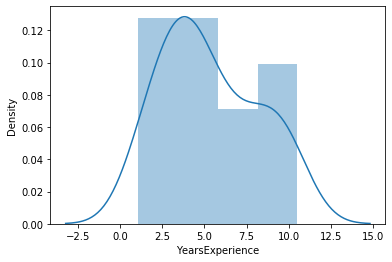

In [24]:
sns.distplot(data.YearsExperience)

In [25]:
sorted(data.YearsExperience)

[1.1,
 1.3,
 1.5,
 2.0,
 2.2,
 2.9,
 3.0,
 3.2,
 3.2,
 3.7,
 3.9,
 4.0,
 4.0,
 4.1,
 4.5,
 4.9,
 5.1,
 5.3,
 5.9,
 6.0,
 6.8,
 7.1,
 7.9,
 8.2,
 8.7,
 9.0,
 9.5,
 9.6,
 10.3,
 10.5]

In [28]:
Q1, Q3 = np.percentile(data.YearsExperience, [25,75])
Q1, Q3

(3.2, 7.700000000000001)

In [29]:
IQR = Q3 - Q1
IQR

4.500000000000001

In [30]:
Q1-(1.5*IQR)

-3.5500000000000016

In [31]:
Q3+(1.5*IQR)

14.450000000000003

In [32]:
# here we made a custom function for remove outlier.
def outLierFree(DataCol):
    # sort data column
    sorted(data.YearsExperience)
    # get percentile 25 and 75
    Q1, Q3 = np.percentile(data.YearsExperience, [25,75])
    # get IQR (interquartile range)
    IQR = Q3 - Q1
    # get lower range
    lowerRange =  Q1-(1.5*IQR)
    # get upper range
    upperRange = Q3+(1.5*IQR)
    
    return lowerRange,upperRange 
    

In [34]:
# here we get data outlier (lower and upper) ranges.
lr,ur = outLierFree(data.YearsExperience)
lr,ur

(-3.5500000000000016, 14.450000000000003)

In [35]:
data[(data.YearsExperience < lr) | (data.YearsExperience > ur)]

,YearsExperience,Salary


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


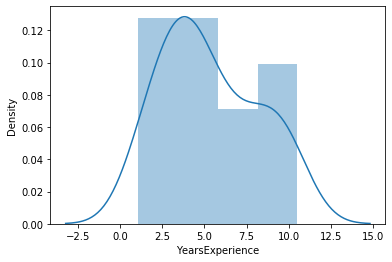

In [36]:
# now we have outlier free data 
# again we doing visualize data

sns.distplot(data.YearsExperience)

# data modeling

In [ ]:
# machine learning 
# Rule of linear regression:
# 1. Seperate your data as features and label
# 2. Ensure both features and label are in the form of numpy arrays
# 3. Ensure both feature and label are 2D arrays
# 4. perform feature scaling (Obviously on Features) (Optional- incase of SKLearn ML algo)


In [41]:
# Rule no:1,2,3
# seperate feature and label
# Ensure both features and label are in the form of numpy arrays
# Ensure both feature and label are 2D arrays
features = data.iloc[:,[0]].values
label = data.iloc[:,[1]].values


# model autimization

In [43]:
# Create Train Test Split where we will use Train Split to train our model
# Test Split to check the quality of the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomstate in range(1,31):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=randomstate)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    trainingScore = model.score(X_train,y_train)
    testingScore = model.score(X_test,y_test)
    
    if testingScore > trainingScore:
        print(" trainingScore : {} and testingScore: {} and random_state : {}".format(trainingScore,testingScore,randomstate))

 trainingScore : 0.9545249190394052 and testingScore: 0.9695039421049821 and random_state : 3
 trainingScore : 0.9528197369259258 and testingScore: 0.9631182154839475 and random_state : 8
 trainingScore : 0.9494673013344644 and testingScore: 0.9816423482070255 and random_state : 10
 trainingScore : 0.9527636176933665 and testingScore: 0.9606215790278543 and random_state : 14
 trainingScore : 0.9460054870434312 and testingScore: 0.9835849730044817 and random_state : 26
 trainingScore : 0.9527636606684406 and testingScore: 0.9636425773684422 and random_state : 27
 trainingScore : 0.9400496694274888 and testingScore: 0.9944092048209744 and random_state : 30


In [44]:
# in autimization process we get random_state= 30 will give better result compare other.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=30)
model = LinearRegression()
model.fit(X_train,y_train)
    
trainingScore = model.score(X_train,y_train)
testingScore = model.score(X_test,y_test)

In [45]:
trainingScore

0.9400496694274888

In [46]:
testingScore

0.9944092048209744

In [ ]:
# model Approved

In [47]:
model.intercept_

array([25566.43561641])

In [48]:
model.coef_

array([[9481.03756369]])

In [ ]:
#Equation of line is 
#Salary = 25566.43561641 + 9481.03756369 (YearsExperience)

#What will be the salary of fresher?
# Rs.25566.43

In [49]:
model.predict(np.array([[0]]))

array([[25566.43561641]])

In [50]:
# User input
yexp = float(input("Enter Years of Experience: "))
sal = model.predict(np.array([[yexp]]))
print("The salary for {} years of experience is {}".format(yexp,sal))

Enter Years of Experience: 2
The salary for 2.0 years of experience is [[44528.51074378]]
